<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера**

Привет! Меня зовут Сысоева Вера.
    
Далее в файле мои комментарии ты сможешь найти в ячейках, аналогичных данной ( если рамки комментария зелёные - всё сделано правильно; жёлтые - есть замечания, но не критично; красные - нужно переделать). Не удаляй эти комментарии и постарайся учесть их в ходе выполнения проекта.
    
Я буду поддерживать версионность комментариев, и при следующих итерациях комментарии будут выделены, как "Комментраии ревьюера - 2 (3 и.т.д.)"
    
Если у тебя есть замечания, возражения и вопросы, ты можешь писать свои комментарии, по возможности выделяй их так же цветом (например, синим), чтоб их можно было легко отделить от текста проекта. 
    
Кстати, предлагаю сразу общаться на "ты".
    
Увидев у тебя ошибку, в первый раз я лишь укажу на ее наличие и дам тебе возможность самой найти и исправить ее. На реальной работе твой начальник будет поступать так же, а я пытаюсь подготовить тебя именно к работе аналитиком. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку.
    
</div>

# Рынок заведений общественного питания Москвы

## Оглавление

## Описание проекта

Вы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами вы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможете ли вы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов? Вы — гуру аналитики, и партнёры просят вас подготовить исследование рынка. У вас есть открытые данные о заведениях общественного питания в Москве.

Цели проекта:

* Сделать общий вывод и дать рекомендации о виде заведения, количестве посадочных мест, а также районе расположения.
* Прокомментировать возможность развития сети.
* Подготовить презентацию для инвестеров

## Описание данных

Таблица rest_data:

* id — идентификатор объекта;
* object_name — название объекта общественного питания;
* chain — сетевой ресторан;
* object_type — тип объекта общественного питания;
* address — адрес;
* number — количество посадочных мест.

## Загрузка данных

In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import graph_objects as go
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_columns',None)

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера**

Молодец, ты правильно настроил отображение целых строк в таблице, так адрес не будет обрезан.
    
Еще фишки по настройки таблиц можно посмотреть здесь https://habr.com/ru/post/521894/
    
</div>

In [153]:
rest_data = pd.read_csv('/datasets/rest_data.csv')

In [154]:
rest_data

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36


In [155]:
# смотрю инфо
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [156]:
# изменяю тип данных
rest_data['chain'].replace(to_replace=['да'], value="True",regex=True, inplace=True)
rest_data['chain'].replace(to_replace=['нет'], value="",regex=True, inplace=True)
rest_data['chain']

0            
1            
2            
3        True
4            
         ... 
15361    True
15362    True
15363    True
15364    True
15365    True
Name: chain, Length: 15366, dtype: object

In [157]:
rest_data['chain']=rest_data['chain'].astype('bool')

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера**

Хороший вариант, хотя на наших масштабах и не аст сильного выигрыша в объеме
    
</div>

In [158]:
# привожу названия заведений к нижнему регистру для поиска дубликатов
rest_data['object_name'] = rest_data['object_name'].str.lower()
rest_data['object_name']

0                       сметана
1                        родник
2               кафе «академия»
3                    пиццетория
4        кафе «вишневая метель»
                  ...          
15361               шоколадница
15362               шоколадница
15363               шоколадница
15364               шоколадница
15365               шоколадница
Name: object_name, Length: 15366, dtype: object

In [159]:
rest_data['address'] = rest_data['address'].str.lower()
rest_data['address']

0               город москва, улица егора абакумова, дом 9
1        город москва, улица талалихина, дом 2/1, корпус 1
2                город москва, абельмановская улица, дом 6
3                  город москва, абрамцевская улица, дом 1
4        город москва, абрамцевская улица, дом 9, корпус 1
                               ...                        
15361         город москва, 3-й крутицкий переулок, дом 18
15362             город москва, улица земляной вал, дом 33
15363             город москва, улица земляной вал, дом 33
15364    город москва, поселение московский, киевское ш...
15365               город москва, ходынский бульвар, дом 4
Name: address, Length: 15366, dtype: object

In [160]:
rest_data.duplicated().sum()

0

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера**

Молодец, что не забыл про дубликаты
    
</div>

In [161]:
# смотрю пропуски
rest_data.isna().sum()

id             0
object_name    0
chain          0
object_type    0
address        0
number         0
dtype: int64

Я загрузил таблицу, изменил тип данных, не нашёл дубликатов и пропусков 

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера**

В целом отличный анализ. Но я бы чуть больше внимания обратила на написание названий. Для подобных столбцов как ты правильно сделал нужен как минимум, перевод в нижний регистр. Но также стоит дополнительно сделать замену ё на е, убрать служебные символы типа " - это важно. Но здесь по-моему проблем немного больше. Давай посмотрим, например, il patio.
    
Тут как минимум есть названия и кирилицей и латиницей. И такая же ситуация с Макдаком, Бургер Кингом и.т.п.
    
По идее надо с этим как-то поработать и это всегда сложно
    
</div>

## Анализ данных

### Исследуйте соотношение видов объектов общественного питания по количеству. Постройте график.

In [162]:
# нахожу все уникальные значения в солбце в видом объекта
object_names = rest_data['object_type'].unique()
object_names

array(['кафе', 'столовая', 'закусочная',
       'предприятие быстрого обслуживания', 'ресторан', 'кафетерий',
       'буфет', 'бар', 'магазин (отдел кулинарии)'], dtype=object)

In [163]:
# строю график соотношения видов объектов

object_type_percent = rest_data['object_type'].value_counts()

fig = go.Figure(data=[go.Pie(labels=object_names, values=object_type_percent)])
fig.show() 

На этом круговой диаграмме видно, что большенство заведений в Москве - кафе (39.7%), затем идут столовые (16.8%),закусочные (14.9%) и фаст фуды (12.5%). Самыми не популярными являются отделы кулинарии (1.78%).

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера**

Хорошо, ты верно все рассчитал. Круговая диаграмма здесь возможно, хотя в целом лучше ее не использовать, если количество типов больше 5.
    
Вообще круг используется чаще, когда хочется показать, что какой-то тип преобладает над другим(и). Иначе, на круге, например, тяжело отличисть 14% и 16%, а вот столбцы были ли бы нагляднее отличимы. Наверное стоило сделать обычную столбчатую диаграмму, хотя это и не ошибка.
    
</div>


### Исследуйте соотношение сетевых и несетевых заведений по количеству. Постройте график.

In [164]:
chain = rest_data['chain'].value_counts().reset_index()
chain

,index,chain
0,False,12398
1,True,2968


In [165]:
chain['index']=chain['index'].astype('object')

In [166]:
chain['index'].replace(to_replace=[False], value="Not chain",regex=True, inplace=True)
chain['index'].replace(to_replace=[True], value="Chain",regex=True, inplace=True)

In [167]:
chain.columns = ['Вид', 'Количество']

In [168]:
chain

,Вид,Количество
0,Not chain,12398
1,Chain,2968


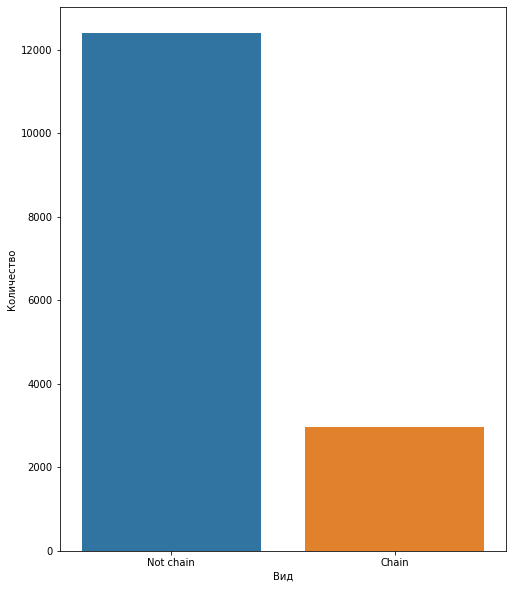

In [169]:
plt.figure(figsize=(8, 10)) 
sns.barplot(
    x='Вид', 
    y='Количество', 
    data=chain
)
plt.show()


На графике видно, что не сетевых ресторанов в 4 раза больше, чем сетевых.

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера**

Ок, а вот здесь как раз круговая диаграмма отлично сработала бы, хотя и столбцы наглядны, но pie-chart мог бы быть более компактным
    
</div>


### Для какого вида объекта общественного питания характерно сетевое распространение?

In [170]:
df_chain_True = rest_data.groupby('object_type')['chain'].agg('sum').sort_values(ascending=False).reset_index()
df_chain_True

,object_type,chain
0,кафе,1396.0
1,предприятие быстрого обслуживания,791.0
2,ресторан,544.0
3,магазин (отдел кулинарии),78.0
4,закусочная,56.0
5,кафетерий,52.0
6,бар,37.0
7,буфет,11.0
8,столовая,3.0


In [171]:
df_chain_True.columns =['Вид','Количество']

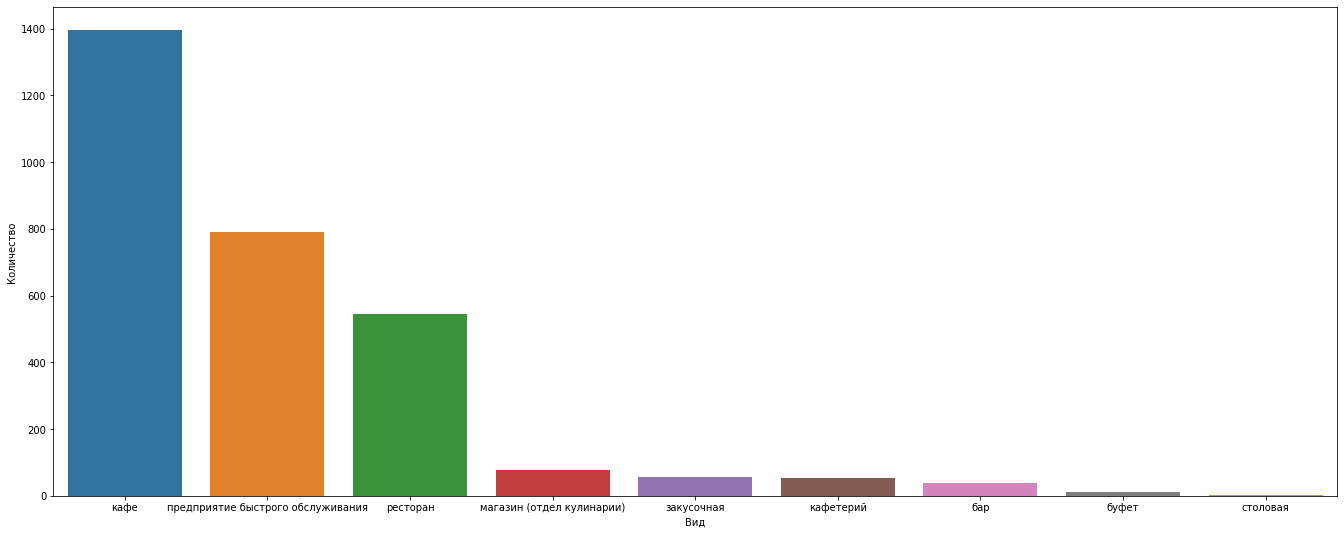

In [172]:
plt.figure(figsize=(23,9)) 
sns.barplot(
    x='Вид', 
    y='Количество', 
    data=df_chain_True
)

plt.show()

Наиболее характерно сетевое распространение для кафе, фаст фуда и ресторанов. Самыми не сетевыми типами объектами стали столовые, буфеты и бары.

<div style="border:solid red 2px; padding: 20px"> 
    
**Комментарий ревьюера**

Нет, здесь не совсем корректный анализ. "Характерно сетевое распространение" - значит процент сетевых среди этого типа ниабольший.
    
Предствь, что у нас 1000 кафе из них 100 сетевых, а баров всего 10 из них 8 сетевых. Да сетевых кафе больше. А вот для какого типа более характерно сетевая принадлежность?
    
</div>


In [173]:
True1 = rest_data.groupby('object_type')['chain'].agg('count').sort_values(ascending=False).reset_index()
True1

,object_type,chain
0,кафе,6099
1,столовая,2587
2,ресторан,2285
3,предприятие быстрого обслуживания,1923
4,бар,856
5,буфет,585
6,кафетерий,398
7,закусочная,360
8,магазин (отдел кулинарии),273


In [174]:
rest_data_true = rest_data.query('chain == False')
True3 = rest_data_true.groupby('object_type')['chain'].agg('count').sort_values(ascending=False).reset_index()
True3

,object_type,chain
0,кафе,4703
1,столовая,2584
2,ресторан,1741
3,предприятие быстрого обслуживания,1132
4,бар,819
5,буфет,574
6,кафетерий,346
7,закусочная,304
8,магазин (отдел кулинарии),195


In [175]:
df_type_count = True3.merge(True1, on = 'object_type') 

In [176]:
df_type_count.columns = ['Вид','Сеть','Всего']

In [177]:
df_type_count

,Вид,Сеть,Всего
0,кафе,4703,6099
1,столовая,2584,2587
2,ресторан,1741,2285
3,предприятие быстрого обслуживания,1132,1923
4,бар,819,856
5,буфет,574,585
6,кафетерий,346,398
7,закусочная,304,360
8,магазин (отдел кулинарии),195,273


In [178]:
df_type_count

,Вид,Сеть,Всего
0,кафе,4703,6099
1,столовая,2584,2587
2,ресторан,1741,2285
3,предприятие быстрого обслуживания,1132,1923
4,бар,819,856
5,буфет,574,585
6,кафетерий,346,398
7,закусочная,304,360
8,магазин (отдел кулинарии),195,273


In [179]:
df_type_count['Не сеть'] = df_type_count['Всего'] - df_type_count['Сеть']

In [180]:
df_type_count['Не сеть, %'] = ((df_type_count['Не сеть']/df_type_count['Всего']) * 100).round(1)

In [181]:
df_type_count['Cеть, %'] = ((df_type_count['Сеть']/df_type_count['Всего']) * 100).round(1)

In [183]:
df_type_count

,Вид,Сеть,Всего,Не сеть,"Не сеть, %","Cеть, %"
0,кафе,4703,6099,1396,22.9,77.1
1,столовая,2584,2587,3,0.1,99.9
2,ресторан,1741,2285,544,23.8,76.2
3,предприятие быстрого обслуживания,1132,1923,791,41.1,58.9
4,бар,819,856,37,4.3,95.7
5,буфет,574,585,11,1.9,98.1
6,кафетерий,346,398,52,13.1,86.9
7,закусочная,304,360,56,15.6,84.4
8,магазин (отдел кулинарии),195,273,78,28.6,71.4


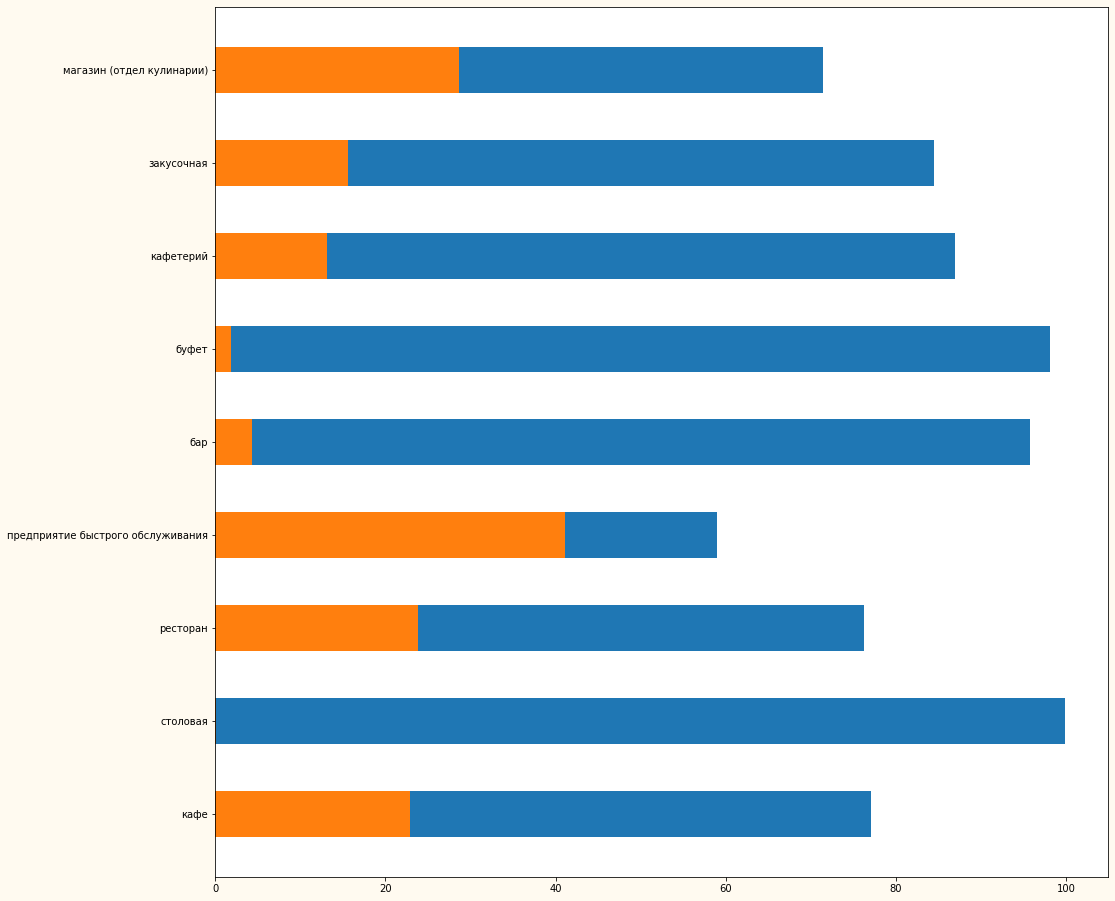

In [238]:
#  Задаем смещение равное половине ширины прямоугольника:
fig, ax1 = plt.subplots()
ax1.barh(df_type_count['Вид'],df_type_count['Cеть, %'], height = 0.5)
ax1.barh(df_type_count['Вид'],df_type_count['Не сеть, %'], height = 0.5)
fig.set_figwidth(16)    #  ширина Figure
fig.set_figheight(16)    #  высота Figure
fig.set_facecolor('floralwhite')

plt.show()

Сетевое распространение наиболее характерным оказалось для фаст-фуда, кафе, ресторанов и магазинов. Среди столовых, буфетов и баров почти нет сетевых заведений.

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера - 2**

Да, вот это правильный подход. Отличный график
    
</div>

### Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

In [22]:
chain_rest = rest_data.query('chain == True')
chain_rest

,id,object_name,chain,object_type,address,number
3,21894,пиццетория,True,кафе,"город москва, абрамцевская улица, дом 1",40
6,148815,брусника,True,кафе,"город москва, переулок сивцев вражек, дом 6/2",10
13,22579,алло пицца,True,кафе,"город москва, улица авиаторов, дом 14",32
16,144107,суши wok,True,предприятие быстрого обслуживания,"город москва, азовская улица, дом 3",7
18,58565,тануки,True,ресторан,"город москва, большая академическая улица, дом 65",160
...,...,...,...,...,...,...
15361,208537,шоколадница,True,кафе,"город москва, 3-й крутицкий переулок, дом 18",50
15362,209264,шоколадница,True,кафе,"город москва, улица земляной вал, дом 33",10
15363,209186,шоколадница,True,кафе,"город москва, улица земляной вал, дом 33",20
15364,221900,шоколадница,True,кафе,"город москва, поселение московский, киевское ш...",36


In [23]:
rests_sits = chain_rest.groupby('object_name')['number'].agg('count').sort_values(ascending=False).reset_index()
rests_sits_1 = chain_rest.groupby('object_name')['number'].agg('sum').sort_values(ascending=False).reset_index()
rests_sits 

,object_name,number
0,шоколадница,157
1,kfc,155
2,макдоналдс,151
3,бургер кинг,137
4,теремок,94
...,...,...
572,меленка,1
573,метро к&к,1
574,милано пицца,1
575,мимино хинкальная,1


In [24]:
rests_sits_1

,object_name,number
0,макдоналдс,13155
1,шоколадница,8978
2,kfc,8578
3,чайхона №1,6399
4,бургер кинг,6391
...,...,...
572,wokker,0
573,tutti frutti,0
574,точка продажи готовой еды милти,0
575,my box,0


In [25]:
rr = rests_sits.merge(rests_sits_1, on='object_name') 
rr['tt'] = rr['number_y'] / rr['number_x']
rr

,object_name,number_x,number_y,tt
0,шоколадница,157,8978,57.184713
1,kfc,155,8578,55.341935
2,макдоналдс,151,13155,87.119205
3,бургер кинг,137,6391,46.649635
4,теремок,94,2407,25.606383
...,...,...,...,...
572,меленка,1,20,20.000000
573,метро к&к,1,80,80.000000
574,милано пицца,1,20,20.000000
575,мимино хинкальная,1,70,70.000000


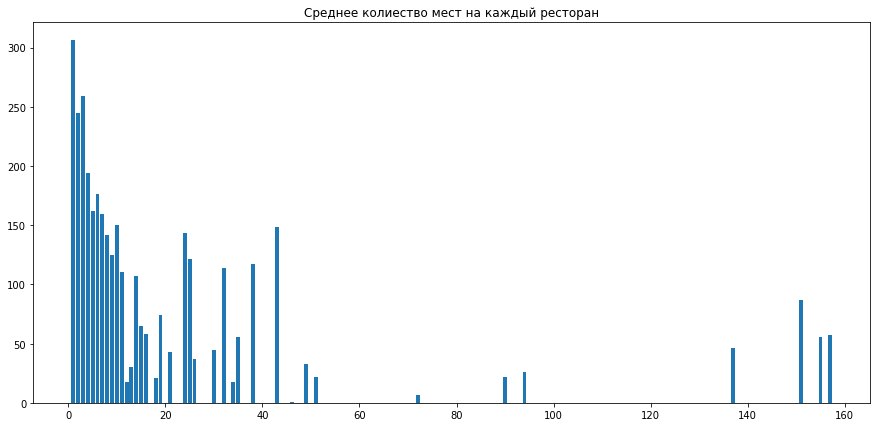

In [26]:
x = rr['number_x']
y = rr['tt']
plt.figure(figsize=(15, 7))
plt.bar(x , y)
plt.title('Среднее колиество мест на каждый ресторан')
plt.show()


Из этого графика нельзя сделать вывод, что количество посадочных места как-то напрямую связано с количеством ресторанов.

<div style="border:solid gold 2px; padding: 20px"> 
    
**Комментарий ревьюера**

Здесь не совсем наглядно. У на двухпараметрический анализ количество мест - количество заведений в сети. В данном случае удобен jointplot, в котором можно соединить, например, scatter и гистограмму, чтоб получилось примерно следующее
    
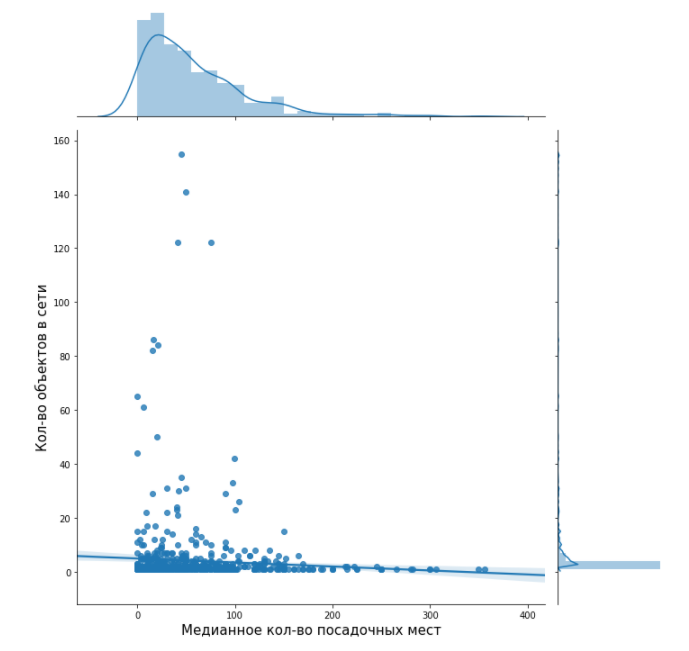
    
</div>


### Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.

In [27]:
sits = rest_data.groupby('object_type')['number'].agg('sum').sort_values(ascending=False).reset_index()
sits_1 =  rest_data.groupby('object_type')['number'].agg('count').sort_values(ascending=False).reset_index()

In [28]:
sits

,object_type,number
0,столовая,336948
1,кафе,242228
2,ресторан,221266
3,предприятие быстрого обслуживания,39522
4,бар,37231
5,буфет,29911
6,кафетерий,3631
7,закусочная,2739
8,магазин (отдел кулинарии),1526


In [29]:
sits_1

,object_type,number
0,кафе,6099
1,столовая,2587
2,ресторан,2285
3,предприятие быстрого обслуживания,1923
4,бар,856
5,буфет,585
6,кафетерий,398
7,закусочная,360
8,магазин (отдел кулинарии),273


In [30]:
rr_1 = sits_1.merge(sits, on='object_type') 
rr_1['tt_1'] = rr_1['number_y'] / rr_1['number_x']
rr1 = rr_1.sort_values(by='tt_1',ascending = True)
rr_1

,object_type,number_x,number_y,tt_1
0,кафе,6099,242228,39.716019
1,столовая,2587,336948,130.246618
2,ресторан,2285,221266,96.834136
3,предприятие быстрого обслуживания,1923,39522,20.552262
4,бар,856,37231,43.494159
5,буфет,585,29911,51.129915
6,кафетерий,398,3631,9.123116
7,закусочная,360,2739,7.608333
8,магазин (отдел кулинарии),273,1526,5.589744


In [31]:
rr_1.columns = ['Вид', 'К-во ресторанов','К-во мест','Среднее количество мест']

In [32]:
rr_1

,Вид,К-во ресторанов,К-во мест,Среднее количество мест
0,кафе,6099,242228,39.716019
1,столовая,2587,336948,130.246618
2,ресторан,2285,221266,96.834136
3,предприятие быстрого обслуживания,1923,39522,20.552262
4,бар,856,37231,43.494159
5,буфет,585,29911,51.129915
6,кафетерий,398,3631,9.123116
7,закусочная,360,2739,7.608333
8,магазин (отдел кулинарии),273,1526,5.589744


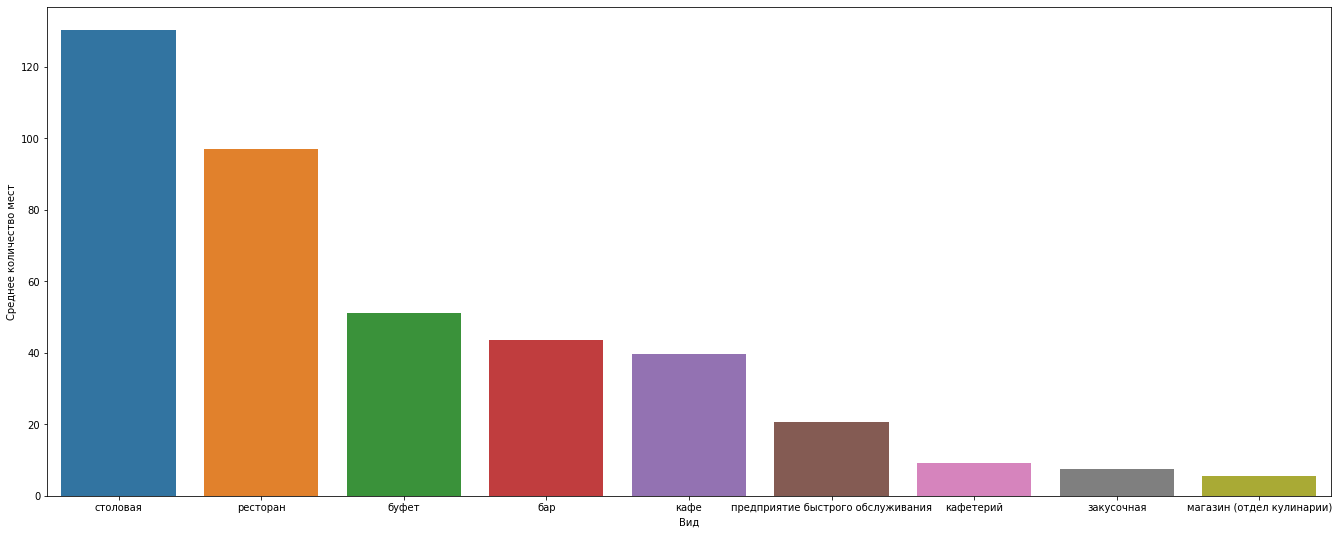

In [33]:
plt.figure(figsize=(23,9)) 
sns.barplot(
    x= 'Вид',
    y= 'Среднее количество мест',
    data=rr_1.sort_values(by='Среднее количество мест',ascending = False)
)
plt.xticks(rotation=360)
plt.show()

На графике видно, что категориями с самым большим количеством посадочных мест являются столовые и рестораны. Далее идут буфеты, бары и кафе. Самое маленькое количество посадочных мест у отделов кулинарии в магазинах. 

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера**

Да, все верно, хорошо, что ты отсортировал столбики. Как вариант здесь можно было сделать Boxplot. так были бы видны не только средние, но и размахи
    
</div>

### Выделите в отдельный столбец информацию об улице из столбца address 

In [34]:
words = ['улица', 'бульвар', 'проспект', 'переулок', 'шоссе', 
'проезд', 'набережная', 'площадь', 'аллея', 'линия', 'квартал', 'мост', 'тупик', 'микрорайон', 'территория', 
         'мкр.','село','километр','ул.']

pattern = '([^,]*?(?:' + format("|".join(words)) + ')[^,]*)'


rest_data["street"] = rest_data["address"].str.extract(pattern)
rest_data["street"] = rest_data["street"].str.strip()
rest_data

,id,object_name,chain,object_type,address,number,street
0,151635,сметана,False,кафе,"город москва, улица егора абакумова, дом 9",48,улица егора абакумова
1,77874,родник,False,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35,улица талалихина
2,24309,кафе «академия»,False,кафе,"город москва, абельмановская улица, дом 6",95,абельмановская улица
3,21894,пиццетория,True,кафе,"город москва, абрамцевская улица, дом 1",40,абрамцевская улица
4,119365,кафе «вишневая метель»,False,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50,абрамцевская улица
...,...,...,...,...,...,...,...
15361,208537,шоколадница,True,кафе,"город москва, 3-й крутицкий переулок, дом 18",50,3-й крутицкий переулок
15362,209264,шоколадница,True,кафе,"город москва, улица земляной вал, дом 33",10,улица земляной вал
15363,209186,шоколадница,True,кафе,"город москва, улица земляной вал, дом 33",20,улица земляной вал
15364,221900,шоколадница,True,кафе,"город москва, поселение московский, киевское ш...",36,киевское шоссе


In [35]:
rest_data[rest_data['street'].isna()].sample(50)

,id,object_name,chain,object_type,address,number,street
9101,162722,кафетерий,False,кафетерий,"город москва, город зеленоград, корпус 435а",3,NaN
8647,142771,пиццерия,False,кафе,"город москва, поселение щаповское, вблизи дере...",22,NaN
7203,149272,кафетерий делисью,False,кафетерий,"город москва, город зеленоград, корпус 514, ст...",20,NaN
12458,193192,кулинария «брецель»,False,кафетерий,"город москва, город зеленоград, корпус 1130",7,NaN
10532,186345,шаурма live,False,предприятие быстрого обслуживания,"город москва, город зеленоград, корпус 607",4,NaN
7236,24024,кафе пронто,True,кафе,"город москва, город зеленоград, корпус 1549",220,NaN
12500,200332,ванчо пицца,False,предприятие быстрого обслуживания,"город москва, поселение московский, деревня го...",30,NaN
11813,186731,пиво,False,бар,"город москва, поселение воскресенское, посёлок...",10,NaN
13838,206630,лаки кинг,False,кафе,"город москва, город зеленоград, корпус 1410",35,NaN
10664,29467,столовая в школе 1912 корп. 1816,False,столовая,"город москва, город зеленоград, корпус 1816",180,NaN


Все оставшиеся строки относятся к городу Зеленоград, которой относится к Москве только формально и к тому же в адресе не указана улица.

### Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

In [36]:
districts = pd.read_csv('mosgaz-streets.csv')
districts

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район
...,...,...,...,...
4393,Вознесенский проезд,17,ЦАО,Пресненский район
4394,Волков переулок,17,ЦАО,Пресненский район
4395,Поварская улица,17,ЦАО,Пресненский район
4396,Кудринская площадь,17,ЦАО,Пресненский район


In [37]:
districts = districts.drop('areaid', 1)

In [38]:
districts.columns = ['street','area','district']

In [39]:
districts['street'] = districts['street'].str.lower()

In [40]:
districts

,street,area,district
0,выставочный переулок,ЦАО,Пресненский район
1,улица гашека,ЦАО,Пресненский район
2,большая никитская улица,ЦАО,Пресненский район
3,глубокий переулок,ЦАО,Пресненский район
4,большой гнездниковский переулок,ЦАО,Пресненский район
...,...,...,...
4393,вознесенский проезд,ЦАО,Пресненский район
4394,волков переулок,ЦАО,Пресненский район
4395,поварская улица,ЦАО,Пресненский район
4396,кудринская площадь,ЦАО,Пресненский район


In [41]:
rest_data_new = rest_data.merge(districts, on='street', how='left')
rest_data_new

,id,object_name,chain,object_type,address,number,street,area,district
0,151635,сметана,False,кафе,"город москва, улица егора абакумова, дом 9",48,улица егора абакумова,СВАО,Ярославский Район
1,77874,родник,False,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35,улица талалихина,ЦАО,Таганский район
2,77874,родник,False,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35,улица талалихина,ЮВАО,Нижегородский район
3,77874,родник,False,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35,улица талалихина,ЮЗАО,Район Южное Бутово
4,24309,кафе «академия»,False,кафе,"город москва, абельмановская улица, дом 6",95,абельмановская улица,ЦАО,Таганский район
...,...,...,...,...,...,...,...,...,...
30163,209264,шоколадница,True,кафе,"город москва, улица земляной вал, дом 33",10,улица земляной вал,ЦАО,Басманный район
30164,209186,шоколадница,True,кафе,"город москва, улица земляной вал, дом 33",20,улица земляной вал,ЦАО,Таганский район
30165,209186,шоколадница,True,кафе,"город москва, улица земляной вал, дом 33",20,улица земляной вал,ЦАО,Басманный район
30166,221900,шоколадница,True,кафе,"город москва, поселение московский, киевское ш...",36,киевское шоссе,ЗАО,Район Внуково


In [42]:
top_streets = rest_data.groupby('street')['id'].count().reset_index().sort_values('id',ascending = False).head(10)
top_streets

,street,id
1105,проспект мира,204
1109,профсоюзная улица,183
724,ленинградский проспект,173
1060,пресненская набережная,167
433,варшавское шоссе,165
727,ленинский проспект,148
1101,проспект вернадского,132
714,кутузовский проспект,114
634,каширское шоссе,112
644,кировоградская улица,110


In [43]:
top_streets.columns = ['Улица','Количество']

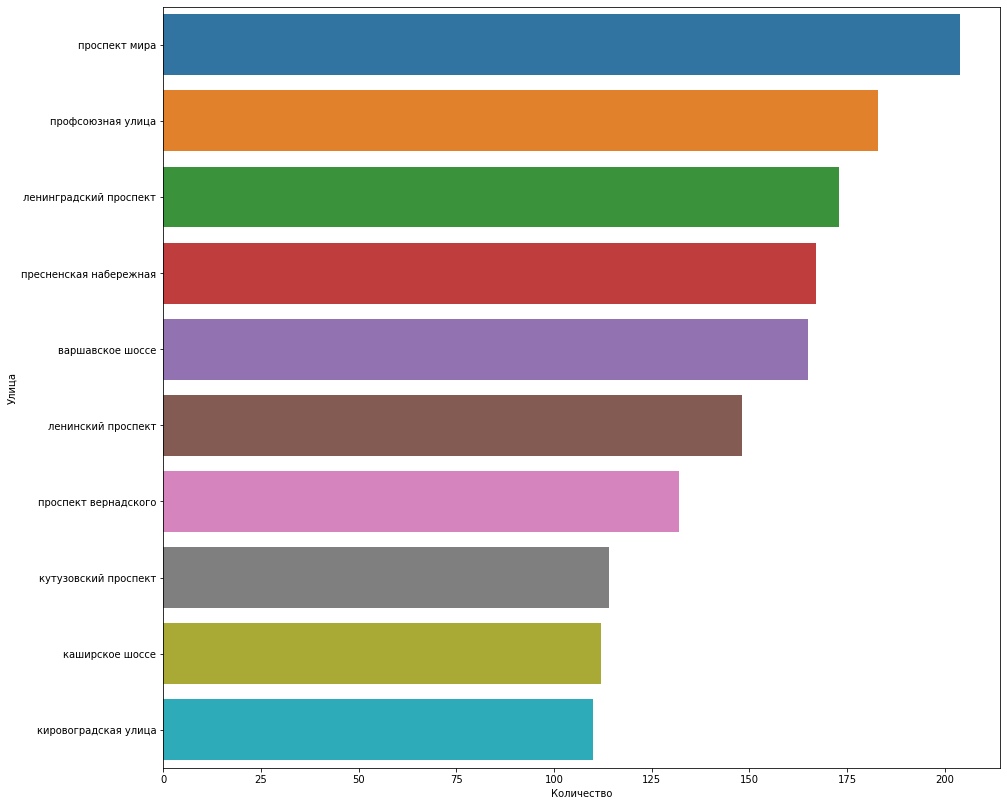

In [44]:
plt.figure(figsize=(15,14)) 
sns.barplot(
    y='Улица', 
 x='Количество', 
    data=top_streets
)

plt.show()

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера**

Отлично, все верно, горизонтальное расположение здесь очень подходит
    
</div>

In [45]:
tttt = rest_data_new.groupby(['street','district'], as_index=False).agg({'id' : 'count'}).sort_values(by = 'id',ascending = False).head(10)

In [46]:
tttt.groupby('district').agg({'id' : 'count'}).sort_values(by='id',ascending = False)

,id
district,
Алексеевский район,1
Мещанский район,1
Обручевский район,1
Останкинский район,1
Район Коньково,1
Район Марьина роща,1
Район Ростокино,1
Район Свиблово,1
Район Ясенево,1


In [47]:
tttt1 = rest_data_new.groupby(['street','area'], as_index=False).agg({'id' : 'count'}).sort_values(by = 'id',ascending = False).head(10)
tttt1.groupby('area').agg({'id' : 'count'}).sort_values(by='id',ascending = False)

,id
area,
САО,3
ЮАО,2
ЮЗАО,2
ЗАО,1
СВАО,1
ЮВАО,1


### Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

In [48]:
one_rest_st = rest_data_new.groupby(['street','district'], as_index=False).agg({'id' : 'count'})
one_rest_st

,street,district,id
0,1-й автозаводский проезд,Даниловский район,3
1,1-й амбулаторный проезд,Район Аэропорт,2
2,1-й балтийский переулок,Район Аэропорт,1
3,1-й басманный переулок,Басманный район,1
4,1-й басманный переулок,Красносельский район,1
...,...,...,...
2316,ясногорская улица,Район Ясенево,1
2317,ясный проезд,Район Южное Медведково,9
2318,яузская улица,Таганский район,4
2319,яузский бульвар,Таганский район,1


In [49]:
one_rest_st = one_rest_st.query('id == "1"')

In [50]:
tttt44 = one_rest_st.groupby('district').agg({'id' : 'count'}).sort_values(by='id', ascending = False).head(10)
tttt44                                                                                          

,id
district,
Таганский район,27
Район Хамовники,26
Басманный район,25
Тверской район,20
Пресненский район,20
Район Арбат,18
Район Марьина роща,18
Мещанский район,15
Район Замоскворечье,14


In [51]:
tttt44 = rest_data_new.groupby(['street','district'], as_index=False).agg({'id' : 'count'}).sort_values(by = 'id',ascending = False).head(10)

### Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?

In [52]:
top_street_ids = rest_data.groupby(['street']).agg({'number' : 'sum', 'id' : 'count'}).round()
top_street_ids = top_street_ids.sort_values(by='id', ascending=False).reset_index().head(10)
top_street_ids

,street,number,id
0,проспект мира,12790,204
1,профсоюзная улица,8667,183
2,ленинградский проспект,9042,173
3,пресненская набережная,7656,167
4,варшавское шоссе,8626,165
5,ленинский проспект,9346,148
6,проспект вернадского,8840,132
7,кутузовский проспект,9697,114
8,каширское шоссе,6171,112
9,кировоградская улица,6577,110


In [53]:
# нахожу все заведения, которые находятся на улицах с самым большим количеством заведений
top_streets = rest_data[rest_data['street'].isin(top_street_ids['street'].unique())].sort_values(by='street')
top_streets

,id,object_name,chain,object_type,address,number,street
151,155973,кафе «андерсон»,True,кафе,"город москва, варшавское шоссе, дом 2",150,варшавское шоссе
7704,75207,семейный ресторан «космик»,True,кафе,"город москва, варшавское шоссе, дом 160",80,варшавское шоссе
7703,73494,бургер кинг,True,предприятие быстрого обслуживания,"город москва, варшавское шоссе, дом 160",70,варшавское шоссе
7702,152159,кафе «шоколадница»,True,кафе,"город москва, варшавское шоссе, дом 160",20,варшавское шоссе
7700,27260,ресторан «тануки»,True,ресторан,"город москва, варшавское шоссе, дом 86",98,варшавское шоссе
...,...,...,...,...,...,...,...
6162,91156,макдоналдс,True,ресторан,"город москва, профсоюзная улица, дом 129а",120,профсоюзная улица
6163,91157,бургер кинг,True,кафе,"город москва, профсоюзная улица, дом 129а",60,профсоюзная улица
6164,91158,маки-маки,True,кафе,"город москва, профсоюзная улица, дом 129а",100,профсоюзная улица
6145,23958,кафе шоколад,True,кафе,"город москва, профсоюзная улица, дом 45а",90,профсоюзная улица


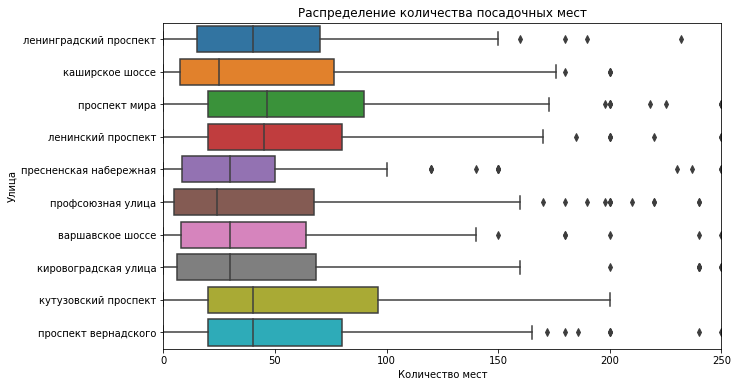

In [54]:

plt.figure(figsize=(10, 6))
plt.xlim(0,250)
plt.title('Распределение количества посадочных мест')
sns.boxplot(x="number", y="street", data=top_streets.sort_values(by='number')) 
plt.xlabel('Количество мест') 
plt.ylabel('Улица') 
plt.show()

Можно сказать, что в среднем посадочных мест около 35. Есть маленькие заведения, где примерно 5 мест и есть большие, где около 100 и больше. 

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера**

Да, все правильно, вот здесь boxplot - отличный выбор
    
</div>

In [251]:
pop = rest_data_new.groupby('area')['id'].nunique().sort_values(ascending=False).reset_index()
pop

,area,id
0,ЦАО,4872
1,ЮАО,2321
2,ЮЗАО,1698
3,СВАО,1610
4,ЗАО,1586
5,САО,1508
6,ВАО,1283
7,ЮВАО,1146
8,СЗАО,803
9,Зеленоград,375


## Вывод

Я проанализировал базу данных московских заведений общественного питания. Можно сделать несколько выводов:
*  Больше всего в Москве заведений типа: кафе(40%), столовых(17%) и закусочных(15%). Меньше всего отделов кулинарии(2%) и баров(2%). 
* Подавляющее количество заведений являются не сетевыми, 12398 против 2968. При этом кафе, фаст-фуд и рестораны чаще всех остальных типов заведений имеюют сетевой тип.
* Анализируя связь между количеством ресторанов и количеством посадочных мест среди сетевых заведений, я не наёл связи между ними.
* Выделяя названия улицы из адреса, я обнаружил, что в данных есть город Зеленоград, который относится к Москве только формально. И в строках с этим городом не указаны названия улиц.
* Улицами с наибольшим количеством ресторанов стали: Проспект мира - 204, Профсоюзная улица - 183, Ленинградский проспект - 173. Находятся они в следующих районах: Алексеевский район, Мещанский район, Обручевский район, Останкинский район, Район Коньково, Район Марьина роща, Район Ростокино, Район Свиблово, Район Ясенево, Ярославский Район.
* Есть улицы, на которых только по одному заведению. Почти все эти заведения находятся в центре города. Это можно объеснить тем, что в центре города очень много переулков и коротких улиц. Таганский район,
Район Хамовники,
Басманный район,
Тверской район,
Пресненский район,
Район Арбат,
Район Марьина роща,
Мещанский район,
Район Замоскворечье,
Район Соколиная Гора
* По поводу количества посадочных мест на самых больших по количеству ресторанов улицах можно сказать, что в среднем посадочных мест около 35. Есть маленькие заведения, где примерно 5 мест и есть большие, где около 100 и больше.

<div style="border:solid gold 2px; padding: 20px"> 
    
**Комментарий ревьюера**

В целом все верно написано, но я бы больше внимания уделила рекомендаиям. Мы проводили анализ, чтоб грамотно открыть новое заведение по типу и расположению. Клиенту не так важно, что где-то не указаны улицы, т.к это не его данные и скорее всего он с этим ничего не может поделдать, а вот узнать, что лучше открывать кафе или бар? с каким количеством посадочных мест? в каком районе? вложится в сетевую франшизу или дать свое название? Все это было бы действительно ценно заказчику....
    
</div>

<div style="border:solid red 2px; padding: 20px"> 
    
**Комментарий ревьюера**

Осталось добавить презентацию
    
</div>

<div style="border:solid green 2px; padding: 20px"> 
    
**Общий комментарий по проекту**

Ты отлично поработал над проектом, данные верно проанализированы и визуализированы. Ты отлично освоил тему построения графиков и визуализации анализа - это очень полезно на практике. У тебя в целом получается яркая, наглядная визуализация. 
    
Пересмотри, пожалуйста, вопрос характерности сетевых заведений и можно переходить к презентации.
    
Также посмотри какие советы.рекомендации можно дать клиенту на основе анализа.
    
Удачи.
</div>

<div style="border:solid red 2px; padding: 20px"> 
    
**Комментарий ревьюера - 2**

Ок, в проекте все отлично, но по-прежнему не нашла ссылку на презентацию.
    
</div>

Презентация: <https://disk.yandex.ru/i/hSDxqYShkJ4t4g>

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера - 3**

Отлично, принято.
    
</div>